In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_excel('fruit.xlsx')

In [3]:
data.head()

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
data['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [7]:
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

In [8]:
X = data.drop('name', axis=1)
y = data['name']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
rf_cm = confusion_matrix(y_test, y_pred)

In [13]:
accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [14]:
print("Akurasi Model:", accuracy)  
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.9515

Laporan Klasifikasi:
               precision    recall  f1-score   support

  grapefruit       0.94      0.96      0.95       988
      orange       0.96      0.94      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



<Figure size 1000x700 with 0 Axes>

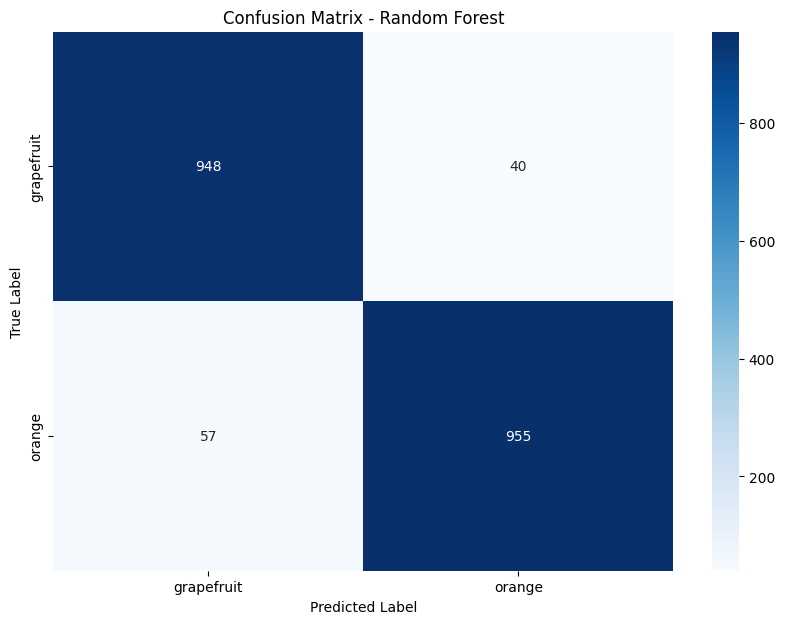

In [15]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\yahya\AppData\Local\Temp\ipykernel_19740\2150307288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=rf_cm.diagonal(), palette="viridis")


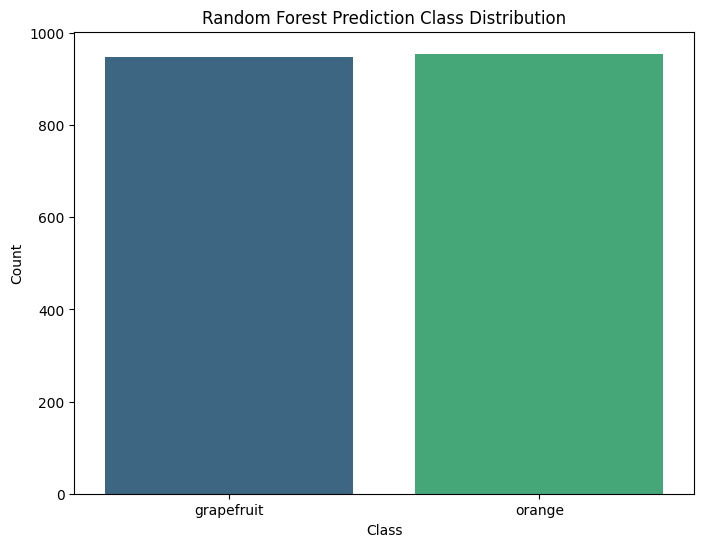

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=le.classes_, y=rf_cm.diagonal(), palette="viridis")
plt.title("Random Forest Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [17]:
new_data = pd.DataFrame({
    'diameter': [2.96, 4.42],  
    'weight': [86.76, 95.17],  
    'red': [172, 156],         
    'green': [85, 81],        
    'blue': [2, 2]            
})
new_predictions = rf_model.predict(new_data)  
new_name = le.inverse_transform(new_predictions)  

for i, name in enumerate(new_name):
    print(f"Data baru {i+1}: Prediksi Nama = {name}")


Data baru 1: Prediksi Nama = orange
Data baru 2: Prediksi Nama = orange


In [18]:
import pickle  
with open("randomforest_fruit_model.pkl", "wb") as rf_file:
    pickle.dump(rf_model, rf_file)